In [4]:
from PIL import Image
from numpy import array, moveaxis, indices, dstack
from pandas import DataFrame
import cv2

image = Image.open("Data/for prediction/data_0.jpeg")
#IMG_SIZE = 80000000

#image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

pixels = image.convert("RGB")
rgbArray = array(pixels.getdata()).reshape(image.size + (3,))
indicesArray = moveaxis(indices(image.size), 0, 2)
allArray = dstack((indicesArray, rgbArray)).reshape((-1, 5))

df = DataFrame(allArray, columns=["y", "x", "red","green","blue"])
print(df.head())
df.to_csv("data1.csv",index=False)

   y  x  red  green  blue
0  0  0  167    172   168
1  0  1  145    150   146
2  0  2  109    114   110
3  0  3   73     78    74
4  0  4   50     54    53


In [1]:
import rasterio as rio
path = "Satellite_image_kutupalong_mega_camps_primary.tif"
data = rio.open(path)
data.crs

CRS.from_epsg(4326)

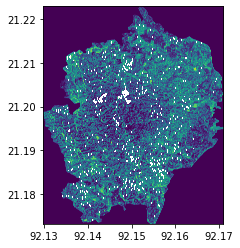

In [2]:
from rasterio.plot import show
show(data)

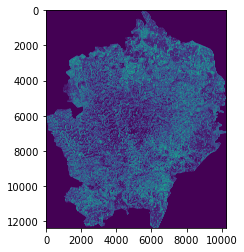

In [3]:
blue = data.read(3)
show(blue)

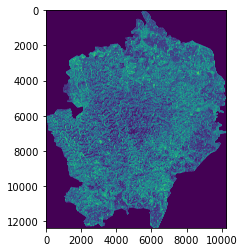

In [4]:
green = data.read(2)
show(green)

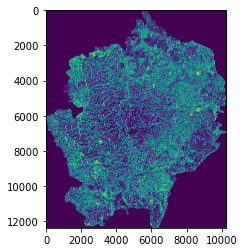

In [5]:
red = data.read(1)
show(red)

In [6]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
a = (green - red)
#VARI = (green - red)/((green + red) - blue)
b = (green + red - blue)
VARI = (a/b)
VARI

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [7]:
allbands = data.read()
allbands

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int16)

In [12]:
red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [13]:
green

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [14]:
blue

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

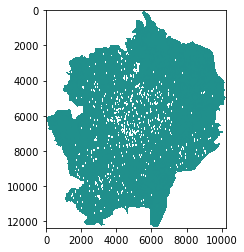

In [8]:
show(VARI)

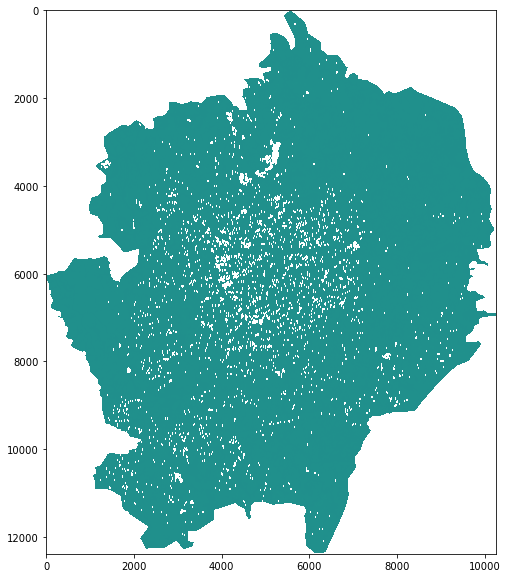

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
show(VARI, ax=ax)

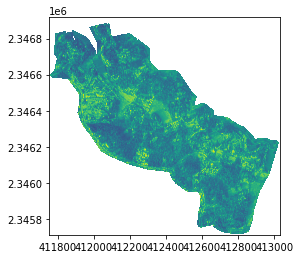

In [10]:
import rasterio as rio
from rasterio.plot import show
drndata = rio.open("20190110_IOM_NPM_SA15_Imagery_Camp 01E.tif")
show(drndata)
#red2 = drndata.read(1)
#green2 = drndata.read(2)
#blue2 = drndata.read(3)
#show(green2)

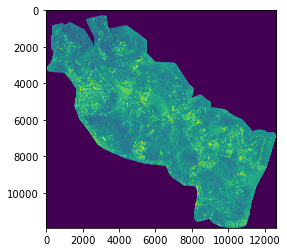

In [11]:
red2 = drndata.read(1)
green2 = drndata.read(2)
blue2 = drndata.read(3)
show(green2)

In [12]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
VARI2 = (green2 - red2)/(green2 + red2 - blue2)
VARI2

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

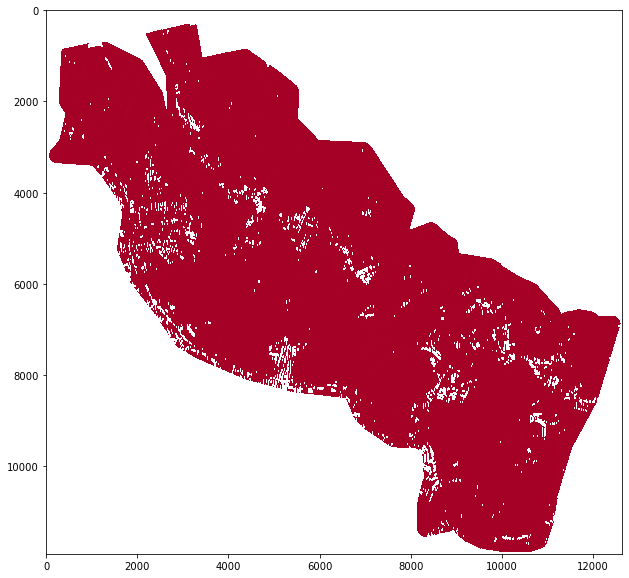

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
show(VARI2, cmap="RdYlGn", ax=ax)

In [19]:
import rasterio as rio
with rio.open("VARI.tif", "w",
             driver="GTiff",
             width=data.width,
             height=data.height,
             count=1,
             crs=data.crs,
             transform=dst.transform,
             dtype="float64"
             ) as dst:
    dst.write(VARI, 1)

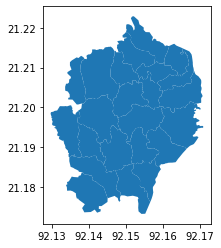

In [19]:
import geopandas as gpd
camps=gpd.read_file("Rohingya_camps_kutupalong_mega_camp/Rohingya_Camps_Kutupalong_mega_camp.shp")
camps.plot()

In [20]:
camps.head()

,District,Upazila,Settlement,Union,Name_Alias,SSID,SMSD__Cnam,NPM_Name,Area_Acres,PeriMe_Met,Camp_Name,Area_SqM,Latitude,Longitude,geometry
0,Cox's Bazar,Ukhia,Collective site,Palong Khali,None,CXB-203,Camp 02E,Camp 02E,96.581786,4803.161699,Camp 2E,391267.799744003,21.2078084302778,92.1643360947381,"POLYGON ((92.16715 21.21409, 92.16753 21.21366..."
1,Cox's Bazar,Ukhia,Collective site,Raja Palong,Kutupalong RC,CXB-221,Camp KRC,Kutupalong RC,95.708508,3094.872237,Kutupalong RC,387729.666427279,21.2120281895357,92.1638095873048,"POLYGON ((92.16546 21.21481, 92.16527 21.21383..."
2,Cox's Bazar,Ukhia,Collective site,Palong Khali,None,CXB-213,Camp 09,Camp 09,160.392251,4116.455437,Camp 9,649769.878002447,21.1899911992394,92.1603127317644,"POLYGON ((92.16030 21.19412, 92.16050 21.19401..."
3,Cox's Bazar,Ukhia,Collective site,Palong Khali,None,CXB-214,Camp 10,Camp 10,122.600202,3732.526329,Camp 10,496664.566973549,21.1897434585344,92.1542587569213,"POLYGON ((92.15018 21.19129, 92.15125 21.19150..."
4,Cox's Bazar,Ukhia,Collective site,Palong Khali,None,CXB-215,Camp 18,Camp 18,185.743353,4554.342175,Camp 18,752455.201838945,21.1889761326069,92.1475900170853,"POLYGON ((92.14732 21.19490, 92.14769 21.19446..."


In [21]:
vari_image=rio.open("VARI")

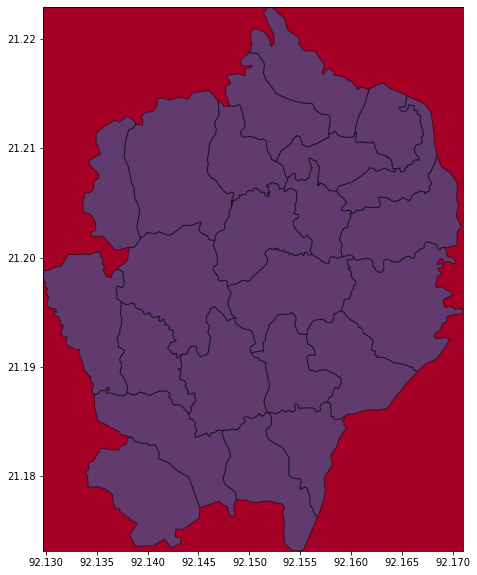

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
show(vari_image, cmap="RdYlGn", ax=ax)
camps.plot(ax=ax, edgecolor="black", alpha=.50)

In [33]:
from rasterio.mask import mask

In [36]:
#mask()

In [37]:
def derive_stats(geom, data=vari_image):
    masked, _ = mask(dataset=data, shapes=(geom, ), crop=True, all_touched=True, filled=True)
    return mask

In [38]:
import numpy as np
grid["mean_vari"] = camps.geometry.apply(derive_stats).apply(np.mean)

TypeError: unsupported operand type(s) for /: 'function' and 'int'

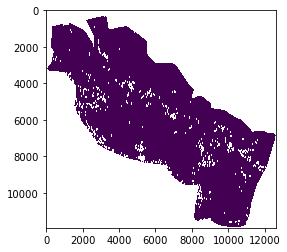

In [23]:
import rasterio as rio
with rio.open("VARI2.tiff", "w",
             driver="GTiff",
             width=drndata.width,
             height=drndata.height,
             count=1,
             crs=drndata.crs,
             transform = dst.transform,
             dtype="float64"
             ) as dst:
    dst.write(VARI2, 1)
    show(VARI2)

NameError: name 'grid' is not defined

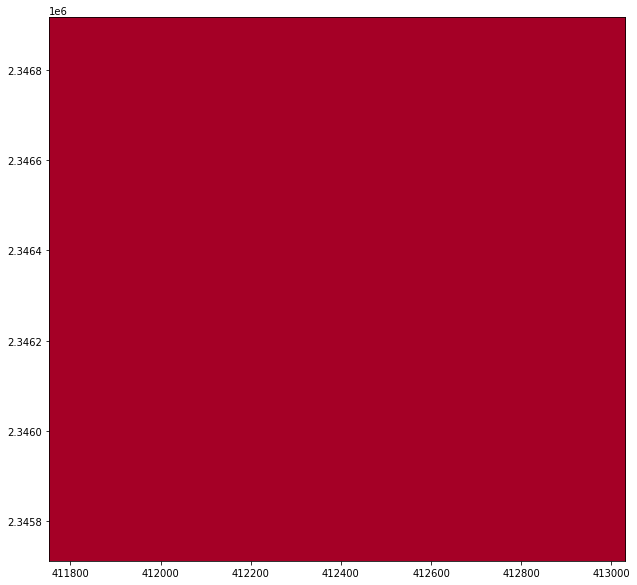

In [7]:
import rasterio as rio
import geopandas as gpd
camp1e=rio.open("VARI2")
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
show(camp1e, cmap="RdYlGn", ax=ax)
grid.plot(ax=ax, edgecolor="black", alpha=.50)

In [9]:
import pprint
import rasterio
from rasterio import features

with rasterio.open("VARI2") as src:
    blue = src.read(1)

mask = blue !=255
shapes = features.shapes(blue, mask=mask)
pprint.pprint(next(shapes))

ValueError: image dtype must be one of: int16, int32, uint8, uint16, float32

In [4]:
from sklearn.cluster import KMeans

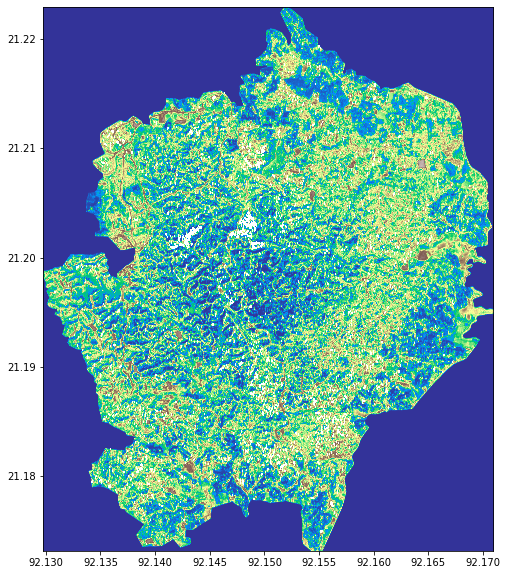

In [5]:
import matplotlib.pyplot as plt
dg=data.read(2)
dg=dg.astype(float)
fig, ax = plt.subplots(figsize=(12,10))
show(data, cmap="terrain", ax=ax)

In [6]:
dg.shape

(12387, 10261)

In [7]:
image_to_cluster = dg.reshape((-1,1))

In [8]:
image_to_cluster.shape

(127103007, 1)

In [9]:
image_to_cluster

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
k_mean = KMeans(n_clusters=7)
k_mean.fit(image_to_cluster)

In [ ]:
k_mean.fit(image_to_cluster)

In [7]:
clusters = k_mean.labels_
clusters

AttributeError: 'KMeans' object has no attribute 'labels_'